In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
from sklearn.model_selection import train_test_split
vector = np.vectorize(np.float64)
df = pd.read_csv('FTIR_data.csv')
classData=df.loc[1931:].values.tolist()
classData=classData[1:]
encodeClassdata = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ]
encodeClassdata = np.array(encodeClassdata)

labelHeader = df['Raman'].to_list()
vector = np.vectorize(np.float64)
labels = df['Raman']
lab = labels[0:1931]

lables = vector(lab)
PCA_dat = df[0:1931]

PCA_dat = PCA_dat.iloc[:, 1:]
Input = np.asarray(PCA_dat)
Input.shape, encodeClassdata.shape
Input_T = Input.T

X_train, X_test, y_train, y_test = train_test_split(Input_T, encodeClassdata,test_size=0.2, random_state=42)

PCA_dat.head
Input.shape, encodeClassdata.shape
Input_T
X_train.shape
y_test.shape

(12,)

In [12]:
vector = np.vectorize(np.float64)
df = pd.read_csv('Raman_Ndata.csv')
classData = df.loc[264, :].values.tolist()
classData = classData[1:]
encodeClassdata = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0,1,1,1, 1, 1, 1, 1,1,1,1,1,1, 1,1,1,1,1,1,1,1,1,1, 1,1,1,1,1,1,1,1]
encodeClassdata = np.array(encodeClassdata)

labelHeader = df['Raman'].to_list()
vector = np.vectorize(np.float64)
labels = df['Raman']
lab = labels[0:264]
#lab
lables = vector(lab)
PCA_dat = df[0:264]
#PCA_dat.head
PCA_dat = PCA_dat.iloc[:, 1:]
Input = np.asarray(PCA_dat)
#Input.shape, encodeClassdata.shape
Input_T = np.transpose(Input)
#Input_T.shape
#classData
X2_train, X2_test, y2_train, y2_test = train_test_split(Input_T, encodeClassdata,test_size=0.2, random_state=42)

count_row = X_train.shape[0]
X2_train.shape
y2_test.shape


(12,)

In [13]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def feature_selection(X_train_source1, X_train_source2, y_train):
    # Select the top 5 features from each source using SelectKBest.
    selector_source1 = SelectKBest(score_func=f_classif, k=48)
    selector_source2 = SelectKBest(score_func=f_classif, k=48)
    
    X_train_source1 = selector_source1.fit_transform(X_train_source1, y_train)
    X_train_source2 = selector_source2.fit_transform(X_train_source2, y_train)

    # Fuse the selected features from each source.
    X_train_fused = np.concatenate([X_train_source1, X_train_source2], axis=1)

    return X_train_fused

In [14]:
X_train=feature_selection(X_train,X2_train,y2_train)
X_train.shape

(48, 96)

In [15]:
X_test=feature_selection(X_test,X2_test,y2_test)
y_test.shape

(12,)

In [16]:
from sklearn.preprocessing import StandardScaler
# Load the data and perform preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_test.shape

(12,)

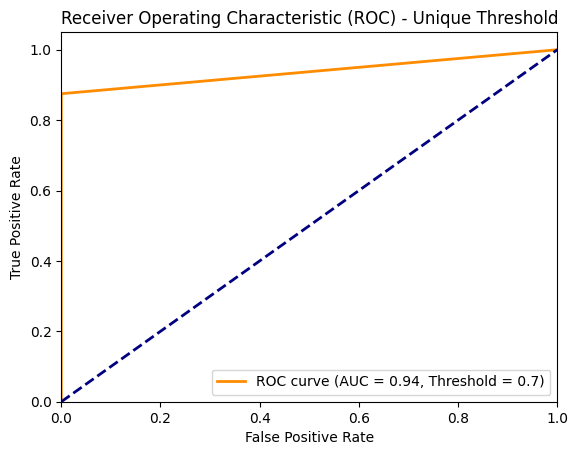

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Generate some example data for binary classification
#X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Random Forest in this example)
classifier = SVC(probability=True)
classifier.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = classifier.predict_proba(X_test)[:, 1]

# Choose your unique threshold (e.g., 0.7)
threshold = 0.7

# Adjust the predictions based on the threshold
y_pred_threshold = np.where(y_prob >= threshold, 1, 0)

# Calculate the ROC curve for the unique threshold
fpr, tpr, _ = roc_curve(y_test, y_pred_threshold)

# Calculate the AUC for the unique threshold
roc_auc = roc_auc_score(y_test, y_pred_threshold)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f}, Threshold = {threshold})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Unique Threshold')
plt.legend(loc='lower right')
plt.show()


best paramters adaboost {'base_estimator': RandomForestClassifier(), 'learning_rate': 0.1, 'n_estimators': 50}


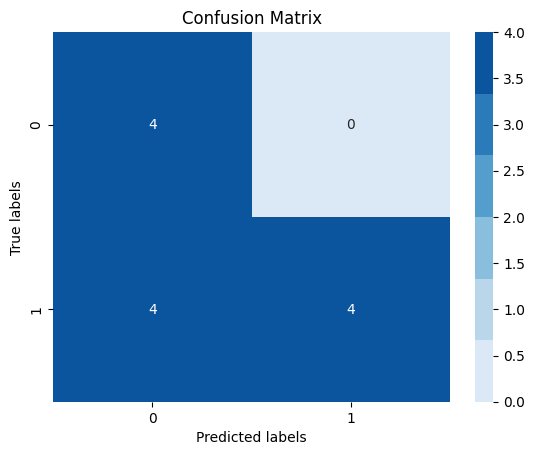

SVM Classifier Performance:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       1.00      0.50      0.67         8

    accuracy                           0.67        12
   macro avg       0.75      0.75      0.67        12
weighted avg       0.83      0.67      0.67        12

Confusion Matrix (SVM):
[[4 0]
 [4 4]]
Cross-validation accuracy (SVM): 0.94


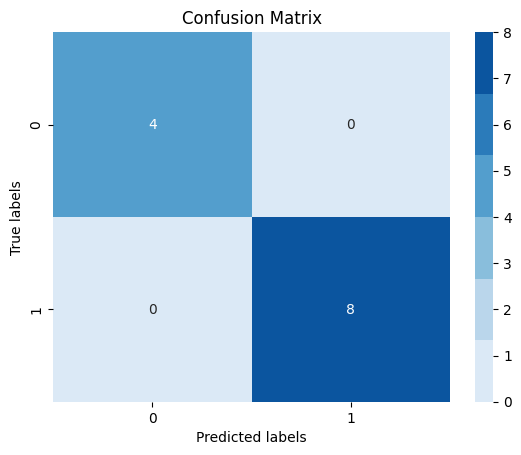

AdaBoost Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion Matrix (AdaBoost):
[[4 0]
 [0 8]]
Cross-validation accuracy (AdaBoost): 0.94


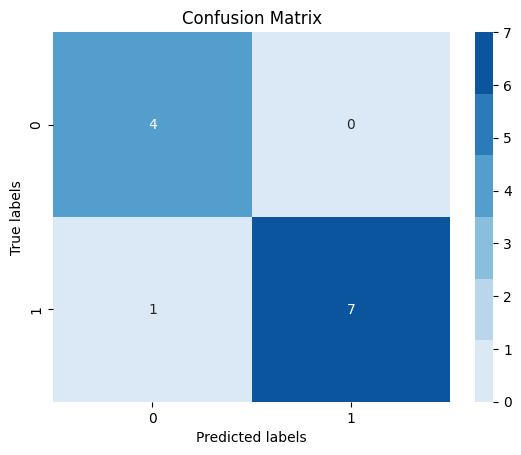

KNN Classifier Performance:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.88      0.93         8

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12

Confusion Matrix (KNN):
[[4 0]
 [1 7]]
Cross-validation accuracy (KNN): 0.96


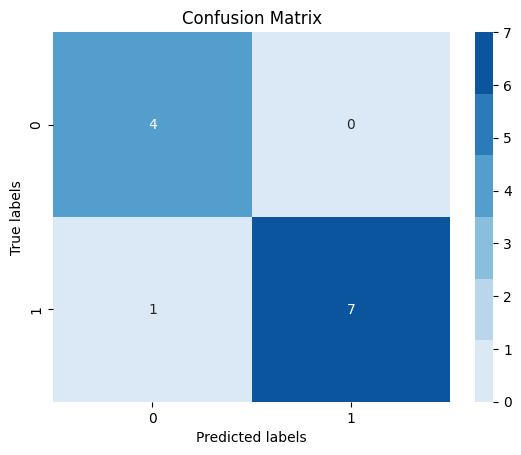

Decision Tree Classifier Performance:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.88      0.93         8

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12

Confusion Matrix (Decision Tree):
[[4 0]
 [1 7]]
Cross-validation accuracy (Decision Tree): 0.89


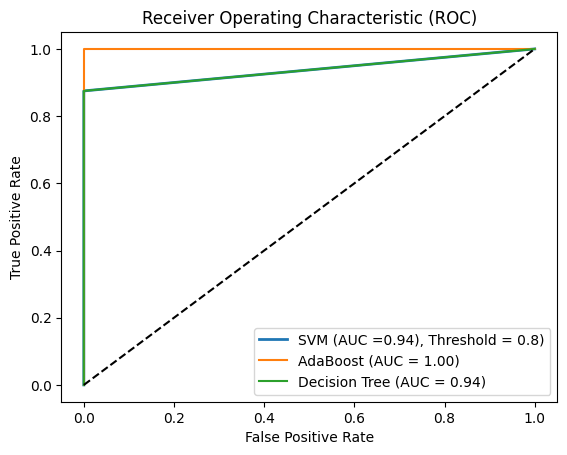

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define the hyperparameters to tune for each model

# Define the parameter grid for each classifier
param_grid = [
    # Parameters for SVM
    {
        'C': [0.1, 1, 10],
        'kernel': ['linear','poly', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    # Parameters for AdaBoost
    {
        'base_estimator': [DecisionTreeClassifier(), RandomForestClassifier()],
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001],
    },
    # Parameters for KNN
    {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    # Parameters for Decision Tree
    {
        'max_depth': [3, 5, 7],
        'criterion': ['gini', 'entropy']
    }
]

# Initialize the models
svm_clf = svm.SVC()
adaboost = AdaBoostClassifier()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()

# Perform hyperparameter tuning for SVM
grid_search_svm = GridSearchCV(svm_clf, param_grid[0], cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameters and best score for SVM
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

# Initialize the best SVM classifier with the best hyperparameters
best_svm = svm.SVC(**best_params_svm)

# Perform cross-validation for SVM
svm_scores = cross_val_score(best_svm, X_train, y_train, cv=5)
mean_svm_score = np.mean(svm_scores)

# Train the best SVM classifier
best_svm.fit(X_train, y_train)

# Perform hyperparameter tuning for AdaBoost
grid_search_adaboost = GridSearchCV(adaboost, param_grid[1], cv=5, scoring='accuracy')
grid_search_adaboost.fit(X_train, y_train)

# Get the best hyperparameters and best score for AdaBoost
best_params_adaboost = grid_search_adaboost.best_params_
print("best paramters adaboost",best_params_adaboost)
best_score_adaboost = grid_search_adaboost.best_score_

# Initialize the best AdaBoost classifier with the best hyperparameters
best_adaboost = AdaBoostClassifier(**best_params_adaboost)

# Perform cross-validation for AdaBoost
adaboost_scores = cross_val_score(best_adaboost, X_train, y_train, cv=5)
mean_adaboost_score = np.mean(adaboost_scores)

# Train the best AdaBoost classifier
best_adaboost.fit(X_train, y_train)

# Perform hyperparameter tuning for KNN
grid_search_knn = GridSearchCV(knn, param_grid[2], cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters and best score for KNN
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

# Initialize the best KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params_knn)

# Perform cross-validation for KNN
knn_scores = cross_val_score(best_knn, X_train, y_train, cv=5)
mean_knn_score = np.mean(knn_scores)

# Train the best KNN classifier
best_knn.fit(X_train, y_train)

# Perform hyperparameter tuning for Decision Tree
grid_search_dt = GridSearchCV(decision_tree, param_grid[3], cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters and best score for Decision Tree
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

# Initialize the best Decision Tree classifier with the best hyperparameters
best_dt = DecisionTreeClassifier(**best_params_dt)

# Perform cross-validation for Decision Tree
dt_scores = cross_val_score(best_dt, X_train, y_train, cv=5)
mean_dt_score = np.mean(dt_scores)

# Train the best Decision Tree classifier
best_dt.fit(X_train, y_train)

# Make predictions using the best SVM classifier
y_pred_svm = best_svm.predict(X_test)
classification_rep_svm = classification_report(y_test, y_pred_svm)
confusion_mat_svm = confusion_matrix(y_test, y_pred_svm)
cmap = sns.color_palette("Blues")  # You can choose any color map you prefer

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat_svm, annot=True, cmap=cmap, fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
print("SVM Classifier Performance:")
print(classification_rep_svm)
print("Confusion Matrix (SVM):")
print(confusion_mat_svm)
print("Cross-validation accuracy (SVM): {:.2f}".format(mean_svm_score))

# Make predictions using the best AdaBoost classifier
y_pred_adaboost = best_adaboost.predict(X_test)
classification_rep_adaboost = classification_report(y_test, y_pred_adaboost)
confusion_mat_adaboost = confusion_matrix(y_test, y_pred_adaboost)
cmap = sns.color_palette("Blues")  # You can choose any color map you prefer

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat_adaboost, annot=True, cmap=cmap, fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
print("AdaBoost Classifier Performance:")
print(classification_rep_adaboost)
print("Confusion Matrix (AdaBoost):")
print(confusion_mat_adaboost)
print("Cross-validation accuracy (AdaBoost): {:.2f}".format(mean_adaboost_score))

# Make predictions using the best KNN classifier
y_pred_knn = best_knn.predict(X_test)
classification_rep_knn = classification_report(y_test, y_pred_knn)
confusion_mat_knn = confusion_matrix(y_test, y_pred_knn)
cmap = sns.color_palette("Blues")  # You can choose any color map you prefer

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat_knn, annot=True, cmap=cmap, fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
print("KNN Classifier Performance:")
print(classification_rep_knn)
print("Confusion Matrix (KNN):")
print(confusion_mat_knn)
print("Cross-validation accuracy (KNN): {:.2f}".format(mean_knn_score))

# Make predictions using the best Decision Tree classifier
y_pred_dt = best_dt.predict(X_test)
classification_rep_dt = classification_report(y_test, y_pred_dt)
confusion_mat_dt = confusion_matrix(y_test, y_pred_dt)
cmap = sns.color_palette("Blues")  # You can choose any color map you prefer

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat_dt, annot=True, cmap=cmap, fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
print("Decision Tree Classifier Performance:")
print(classification_rep_dt)
print("Confusion Matrix (Decision Tree):")
print(confusion_mat_dt)
print("Cross-validation accuracy (Decision Tree): {:.2f}".format(mean_dt_score))

# Calculate the ROC curve and AUC for each classifier
svm_probs = best_svm.decision_function(X_test)
adaboost_probs = best_adaboost.predict_proba(X_test)[:, 1]
knn_probs = best_knn.predict_proba(X_test)[:, 1]
dt_probs = best_dt.predict_proba(X_test)[:, 1]

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, adaboost_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)

roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_dt = auc(fpr_dt, tpr_dt)
##
classifier = SVC(probability=True)
classifier.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = classifier.predict_proba(X_test)[:, 1]

# Choose your unique threshold (e.g., 0.7)
threshold = 0.8

# Adjust the predictions based on the threshold
y_pred_threshold = np.where(y_prob >= threshold, 1, 0)

# Calculate the ROC curve for the unique threshold
fpr, tpr, _ = roc_curve(y_test, y_pred_threshold)

# Calculate the AUC for the unique threshold
roc_auc = roc_auc_score(y_test, y_pred_threshold)

# Plot the ROC curve
'''
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f}, Threshold = {threshold})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Unique Threshold')
plt.legend(loc='lower right')
plt.show()
'''
##

# Plot the ROC curves
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'SVM (AUC ={roc_auc:.2f}), Threshold = {threshold})')
plt.plot(fpr_adaboost, tpr_adaboost, label='AdaBoost (AUC = {:.2f})'.format(roc_auc_adaboost))
#plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


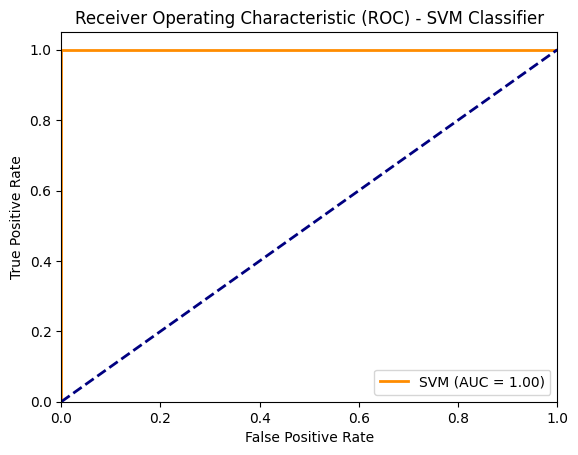

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Generate some example data for binary classification


# Train the SVC classifier
classifier = SVC(probability=True, random_state=42)
classifier.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve and AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SVM Classifier')
plt.legend(loc='lower right')
plt.show()


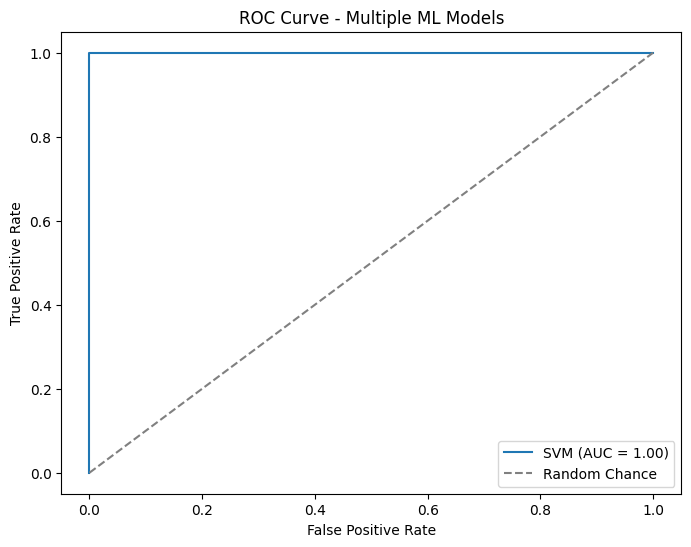

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

model = SVC(probability=True)
'''
  ("DecisionTreeClassifier", DecisionTreeClassifier()),
    )
    '''


# Plot ROC curve for each model
plt.figure(figsize=(8, 6))
#for name, model in models:
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc=auc(fpr,tpr)
#auc = roc_auc_score(y_test, y_score)
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')

# Plot the random chance line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiple ML Models')

# Set plot legend
plt.legend(loc='lower right')

# Display the plot
plt.show()


In [13]:
model_list= [
    ("AdaBoostClassifier", AdaBoostClassifier(base_estimator=RandomForestClassifier())),
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("SVM", SVC(probability=True)) ]


In [14]:
import numpy as np
from scipy.stats import pearsonr
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from matplotlib import pyplot as plt


def evaluate_model(cv, model, X, y):
    """
    Evaluate the performance of a model using cross-validation.

    Args:
        cv: Cross-validation strategy object.
        model: Model object to evaluate.
        X (array-like): Input data matrix of shape (n_samples, n_features).
        y (array-like): Target values of shape (n_samples,).

    Returns:
        mean_score: Mean cross-validation score.
    """
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    mean_score = np.mean(scores)
    return mean_score


def sensitivity_analysis(model_list, X_train, y_train):
    """
    Perform a sensitivity analysis of the number of folds used in K-fold cross-validation.

    Args:
        model_list: List of models to analyze.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.

    Returns:
        None
    """
    r_max = X_train.shape[1]
    folds = range(2, r_max)
    means, mins, maxs = [], [], []

    for model in model_list:
        ideal, _, _ = evaluate_model(LeaveOneOut(), model, X_train, y_train)
        print(type(model).__name__)
        print('Ideal: %.3f' % ideal)

        for k in folds:
            cv = KFold(n_splits=k, shuffle=True, random_state=1)
            k_mean = evaluate_model(cv, model, X_train, y_train)
            k_min = k_mean - np.min(k_mean)
            k_max = np.max(k_mean) - k_mean
            print('> folds=%d, accuracy=%.3f (%.3f, %.3f)' %
                  (k, k_mean, k_min, k_max))
            means.append(k_mean)
            mins.append(k_min)
            maxs.append(k_max)

        plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
        plt.plot(folds, [ideal for _ in range(len(folds))], color='r')
        plt.xlabel('Number of Folds')
        plt.ylabel('Accuracy')
        plt.title('Sensitivity Analysis of K-Fold Cross-Validation')
        plt.show()


def pearson_correlation_analysis(model_list, X_train, y_train):
    """
    Perform Pearson correlation analysis between ideal cross-validation and K-fold cross-validation.

    Args:
        model_list: List of models to analyze.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.

    Returns:
        None
    """
    ideal_cv = LeaveOneOut()
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    ideal_results, cv_results = [], []

    for model in model_list:
        cv_mean = evaluate_model(cv, model, X_train, y_train)
        ideal_mean = evaluate_model(ideal_cv, model, X_train, y_train)

        if np.isnan(cv_mean) or np.isnan(ideal_mean):
            continue

        cv_results.append(cv_mean)
        ideal_results.append(ideal_mean)

        print('>%s: ideal=%.3f, cv=%.3f' %
              (type(model).__name__, ideal_mean, cv_mean))

    corr, _ = pearsonr(cv_results, ideal_results)
    print('Correlation: %.3f' % corr)

    plt.scatter(cv_results, ideal_results)
    coeff, bias = np.polyfit(cv_results, ideal_results, 1)
    line = coeff * np.asarray(cv_results) + bias
    plt.plot(cv_results, line, color='r')
    plt.xlabel('K-Fold Cross-Validation Accuracy')
    plt.ylabel('Ideal Cross-Validation Accuracy')
    plt.title('Pearson Correlation Analysis')
    plt.show()


sensitivity_analysis(model_list, X_train, y_train)

TypeError: not all arguments converted during string formatting

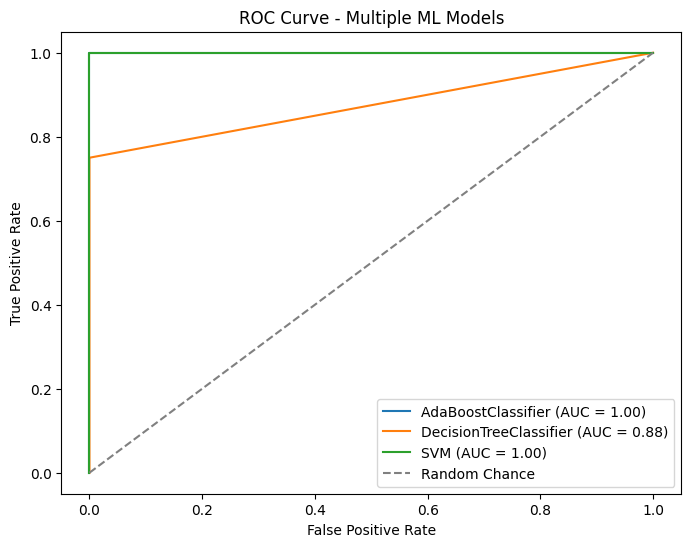

In [25]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
#from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier



models = [
    ("AdaBoostClassifier", AdaBoostClassifier(base_estimator=RandomForestClassifier())),
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("SVM", SVC(probability=True)) ]


# Plot ROC curve for each model
plt.figure(figsize=(8, 6))
for name, model in models:
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    #roc_auc=auc(fpr,tpr)
    auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot the random chance line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiple ML Models')

# Set plot legend
plt.legend(loc='lower right')

# Display the plot
plt.show()


In [21]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define the hyperparameters to tune for each model
param_grid = [
    {
        'base_estimator': [DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier()],
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001],
    },
    {
        'n_neighbors': [3, 5, 7],
    }
]

# Initialize the models
adaboost = AdaBoostClassifier()
knn = KNeighborsClassifier()

# Perform hyperparameter tuning for AdaBoost
grid_search_adaboost = GridSearchCV(adaboost, param_grid[0], cv=5, scoring='accuracy')
grid_search_adaboost.fit(X_train, y_train)

# Get the best hyperparameters and best score for AdaBoost
best_params_adaboost = grid_search_adaboost.best_params_
best_score_adaboost = grid_search_adaboost.best_score_

# Initialize the best AdaBoost classifier with the best hyperparameters
best_adaboost = AdaBoostClassifier(**best_params_adaboost)

# Train the best AdaBoost classifier
best_adaboost.fit(X_train, y_train)

# Perform hyperparameter tuning for KNN
grid_search_knn = GridSearchCV(knn, param_grid[1], cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters and best score for KNN
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

# Initialize the best KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params_knn)

# Train the best KNN classifier
best_knn.fit(X_train, y_train)

# Make predictions using the best AdaBoost classifier
y_pred_adaboost = best_adaboost.predict(X_test)
classification_rep_adaboost = classification_report(y_test, y_pred_adaboost)
print("AdaBoost Classifier Performance:")
print(classification_rep_adaboost)

# Make predictions using the best KNN classifier
y_pred_knn = best_knn.predict(X_test)
classification_rep_knn = classification_report(y_test, y_pred_knn)
print("KNN Classifier Performance:")
print(classification_rep_knn)



AdaBoost Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

KNN Classifier Performance:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.88      0.93         8

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12



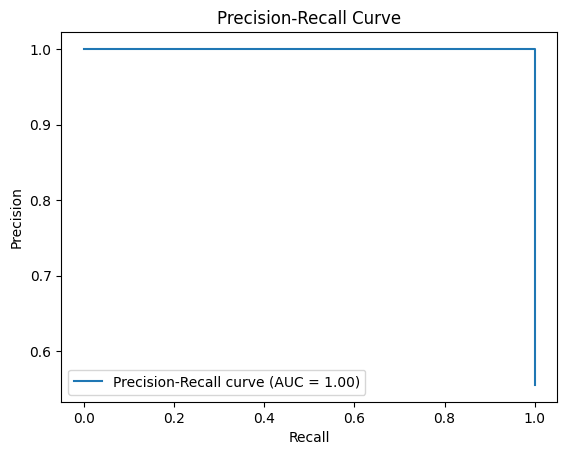

In [10]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already trained and obtained the predicted probabilities for your model
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate AUC-PR
auc_pr = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve (AUC = %0.2f)' % auc_pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier
# Load and preprocess your data
# ...
# X_train, X_test, y_train, y_test = train_test_split(...)

# Define the function to create the Keras model
def create_model(dropout_rate=0.5, learning_rate=0.01):
    model = Sequential()
    model.add(Conv1D(256, 2, activation='relu', input_shape=(100, 1)))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(416, 2, activation='relu'))
    model.add(MaxPooling1D(2))
    
    model.add(Dense(320, activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='sigmoid'))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define a list of dropout rates and learning rates to try
#model = KerasClassifier(build_fn=create_model, epochs=12, batch_size=28)
dropout_rates = [0.5, 0.7, 0.9]
learning_rates = [0.01, 0.001, 0.0001]

# Plot ROC curves for different hyperparameters
plt.figure(figsize=(10, 6))

for dropout_rate in dropout_rates:
    for learning_rate in learning_rates:
        model =KerasClassifier(build_fn=create_model(dropout_rate,learning_rate), epochs=12, batch_size=28)
        model.fit(X_train, y_train, epochs=10, batch_size=28, verbose=0)
        
        # Predict probabilities for the positive class
        y_scores = model.predict_proba(X_test)
        #y_scores = y_scores[:, 1]  
        
        # Compute false positive rate and true positive rate
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        
        # Compute AUC score
        roc_auc = auc(fpr, tpr)
        
        # Plot the ROC curve
        label = f"Dropout={dropout_rate}, LR={learning_rate}, AUC={roc_auc:.2f}"
        plt.plot(fpr, tpr, label=label)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


1/1 [==============================] - 0s 189ms/step


ValueError: y should be a 1d array, got an array of shape (12, 2) instead.

<Figure size 1000x600 with 0 Axes>

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_scores)
sns.heatmap(cm,annot=True)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

1/1 [==============================] - 0s 144ms/step


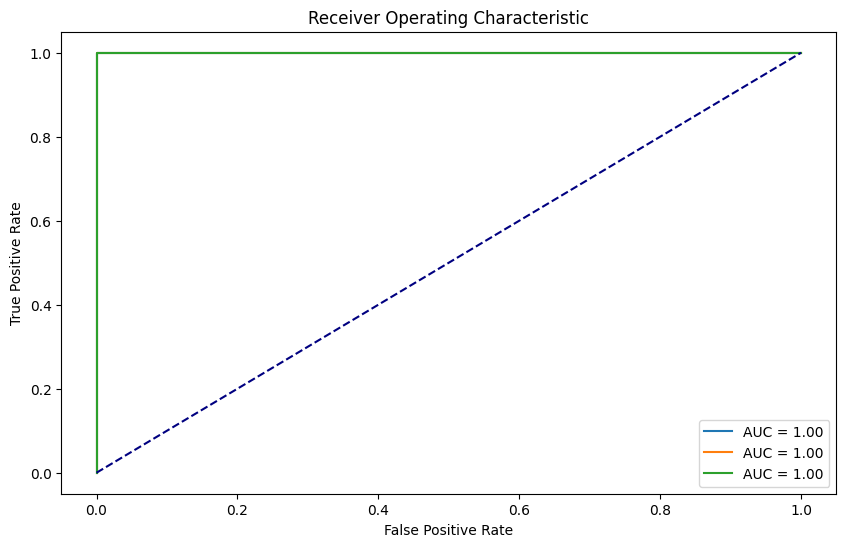

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier

architectures = [
    [
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(100, 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(1, activation='sigmoid')
    ],
    [
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(100, 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(320, activation='relu'),
        Dropout(0.7),
        Dense(1, activation='sigmoid')
    ],
    [
        Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(100, 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dropout(0.7),
        Dense(1, activation='sigmoid')
    ]
]



plt.figure(figsize=(10, 6))

for architecture in architectures:
    model = Sequential(architecture)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)
    
    y_pred = model.predict(X_test)
    y_score=y_pred[:,0]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils import all_estimators
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    """
    Train and evaluate a classifier on the given training and test data.

    Args:
        classifier: The classifier instance to evaluate.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.
        X_test (array-like): Test data matrix of shape (n_samples, n_features).
        y_test (array-like): Target values for the test data.

    Returns:
        None
    """
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Accuracy:", '{0:.2%}'.format(accuracy_score(y_test, prediction)))
    print("Cross Validation Score:", '{0:.2%}'.format(cross_val_score(
        classifier, X_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score:", '{0:.2%}'.format(
        roc_auc_score(y_test, prediction)))
    plot_roc_curve(classifier, X_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()


def evaluate_model_classification(classifier, X_test, y_test, colors=['#F93822', '#FDD20E']
):
    """
    Evaluate a classifier on the given test data and display the confusion matrix and classification report.

    Args:
        classifier: The classifier instance to evaluate.
        X_test (array-like): Test data matrix of shape (n_samples, n_features).
        y_test (array-like): Target values for the test data.

    Returns:
        None
    """
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value)
                   for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2,
              v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap=colors, fmt='')

    # Classification Report
    print(classification_report(y_test, classifier.predict(X_test)))


def run_functions_on_models(models, function1, function2, X_train, y_train, X_test, y_test):
    """
    Run the given functions on each sequential model.

    Args:
        models (list): List of sequential models to evaluate.
        function1: The first function to run on each model.
        function2: The second function to run on each model.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.
        X_test (array-like): Test data matrix of shape (n_samples, n_features).
        y_test (array-like): Target values for the test data.

    Returns:
        None
    """
    for i, model in enumerate(models):
        try:
            print(f"Running {function1.__name__} and {function2.__name__} on Model {i+1}...")
            model.fit(X_train, y_train)
            function1(model, X_train, y_train, X_test, y_test)
            function2(model, X_test, y_test)
            print("Completed successfully!")
        except Exception as e:
            print(f"Error encountered while fitting Model {i+1}: {str(e)}")
            continue


# Define your sequential models with different layers
model1 = Sequential()
model1.add(Dense(64, input_dim=10, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model2 = Sequential()
model2.add(Dense(128, input_dim=10, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# Create a list of sequential models
models = [model1, model2]

# Assuming you have your X_train, y_train, X_test, and y_test defined
# Run the functions on each sequential model
run_functions_on_models(models, evaluate_model, evaluate_model_classification, X_train, y_train, X_test, y_test)


Running evaluate_model and evaluate_model_classification on Model 1...
Error encountered while fitting Model 1: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.
Running evaluate_model and evaluate_model_classification on Model 2...
Error encountered while fitting Model 2: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.
